In [ ]:
import sys
from os import P_ALL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

In [189]:
# Configure logging
logging.basicConfig(
    filename="ml_pipeline.log",
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
)

In [190]:
file_path = "/content/drive/MyDrive/store sales data/train.csv"

In [191]:
train_data = pd.read_csv(file_path)
train_data.head()

<ipython-input-191-96960671b6f9>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(file_path)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [192]:
train_data = pd.read_csv("/content/drive/MyDrive/store sales data/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/store sales data/test.csv")

<ipython-input-192-19e2e2a27fba>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("/content/drive/MyDrive/store sales data/train.csv")


In [193]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [194]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [195]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

**Handling missing values**

In [196]:
train_data.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [197]:
# Convert 'Date' to datetime format for analysis
train_data['Date'] = pd.to_datetime(train_data['Date'])

**Handling outliers**

In [198]:
# Define a function to remove outliers using z-score
def remove_outliers(data, column, threshold=3):
    z_scores = zscore(data[column])
    abs_z_scores = np.abs(z_scores)
    return data[abs_z_scores < threshold]

# Apply outlier removal to Sales and Customers
train_data = remove_outliers(train_data , 'Sales')
train_data = remove_outliers(train_data , 'Customers')

In [199]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 996977 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          996977 non-null  int64         
 1   DayOfWeek      996977 non-null  int64         
 2   Date           996977 non-null  datetime64[ns]
 3   Sales          996977 non-null  int64         
 4   Customers      996977 non-null  int64         
 5   Open           996977 non-null  int64         
 6   Promo          996977 non-null  int64         
 7   StateHoliday   996977 non-null  object        
 8   SchoolHoliday  996977 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 76.1+ MB
None


**Analyze Sales Trends**

In [200]:
daily_sales = train_data.groupby('Date')['Sales'].sum()


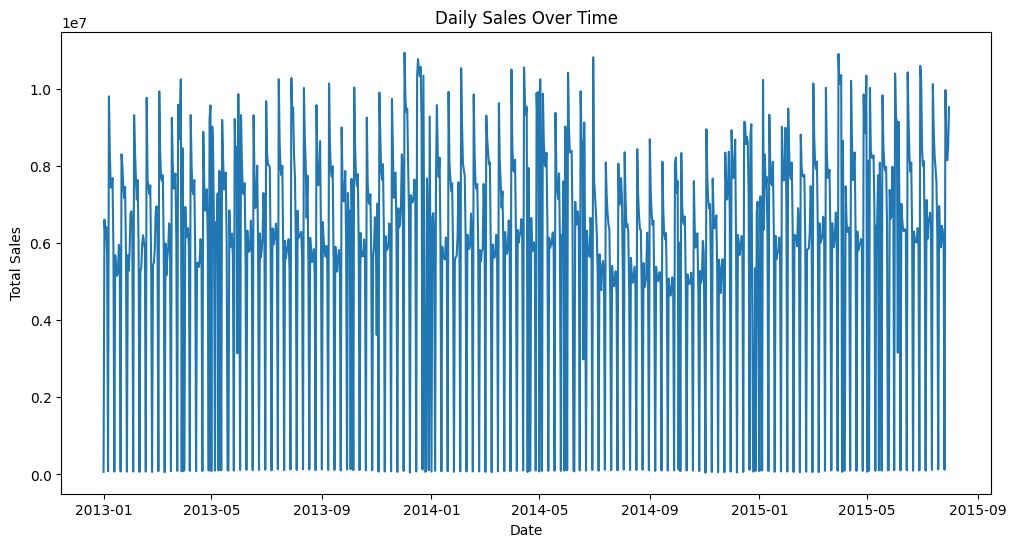

In [201]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

**Effect of Promotions on Sales**

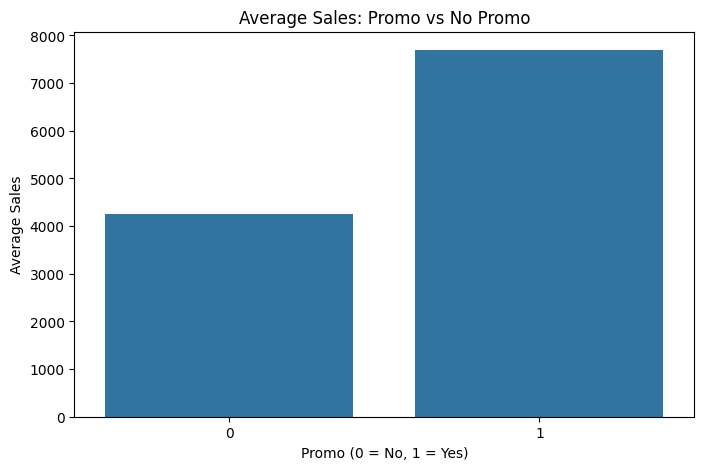

In [202]:
promo_sales = train_data.groupby('Promo')['Sales'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=promo_sales.index, y=promo_sales.values)
plt.title('Average Sales: Promo vs No Promo')
plt.xlabel('Promo (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.show()

**Effect of Store Openings on Customers**

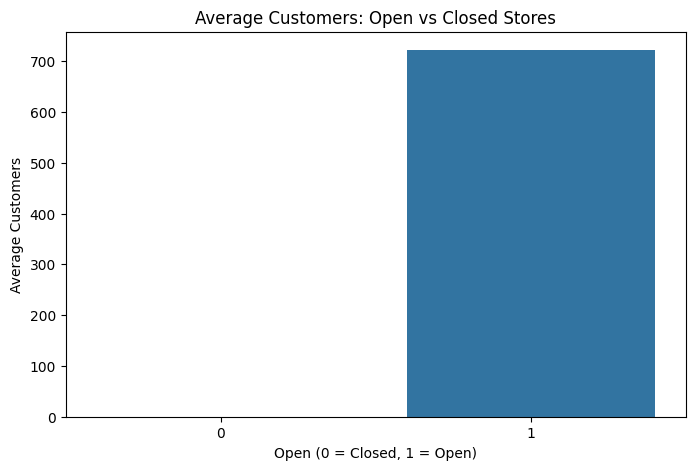

In [203]:
open_customers = train_data.groupby('Open')['Customers'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=open_customers.index, y=open_customers.values)
plt.title('Average Customers: Open vs Closed Stores')
plt.xlabel('Open (0 = Closed, 1 = Open)')
plt.ylabel('Average Customers')
plt.show()

**Analyze Correlations**

In [204]:
for col in ['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']:
    try:
        train_data[col] = pd.to_numeric(train_data[col])
    except ValueError:
      print(f"Warning: Column '{col}' contains non-numeric values.")

In [205]:
state_holiday_mapping = {'a': 1, 'b': 2, 'c': 3}
train_data['StateHoliday'] = train_data['StateHoliday'].map(state_holiday_mapping)

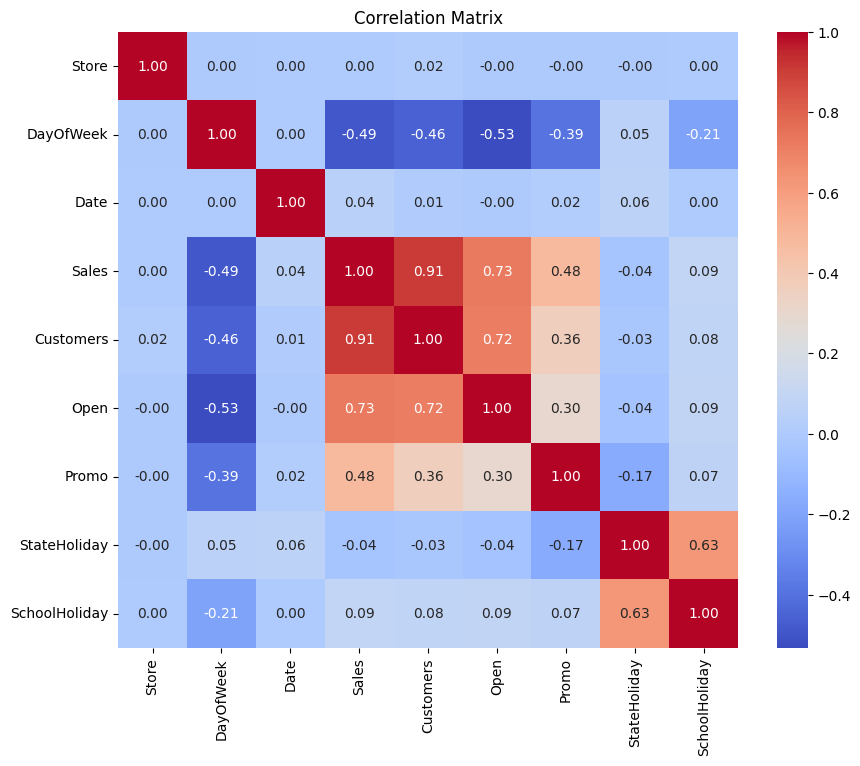

In [206]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Variability with Sales**

<ipython-input-207-062d012b9815>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Promo', y='Sales', palette='viridis')


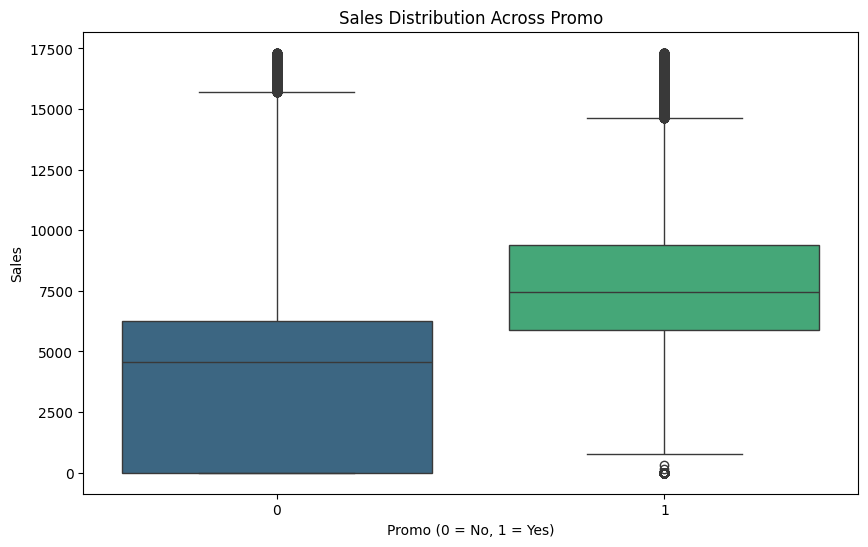

In [207]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Promo', y='Sales', palette='viridis')
plt.title('Sales Distribution Across Promo')
plt.xlabel('Promo (0 = No, 1 = Yes)')
plt.ylabel('Sales')
plt.show()

**Observations**

Sales increase significantly during promotions.

Open stores naturally have higher customer counts.

The correlation matrix reveals relationships among features, especially with Sales.

**comparions of promotion distributions between test and train data**

In [208]:
train_promotions = train_data['Promo'].value_counts(normalize=True)
test_promotions = test_data['Promo'].value_counts(normalize=True)

# Combine for easier comparison
distribution_df = pd.DataFrame({
    "Train": train_promotions,
    "Test": test_promotions
}).reset_index().rename(columns={'index': 'Promotion'})

print("Training Set Promotion Distribution:\n", train_promotions)
print("\nTest Set Promotion Distribution:\n", test_promotions)

Training Set Promotion Distribution:
 Promo
0    0.62204
1    0.37796
Name: proportion, dtype: float64

Test Set Promotion Distribution:
 Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


Average sales during holidays:
 StateHoliday
1.0    170.572253
2.0     79.456613
3.0     78.713515
Name: Sales, dtype: float64


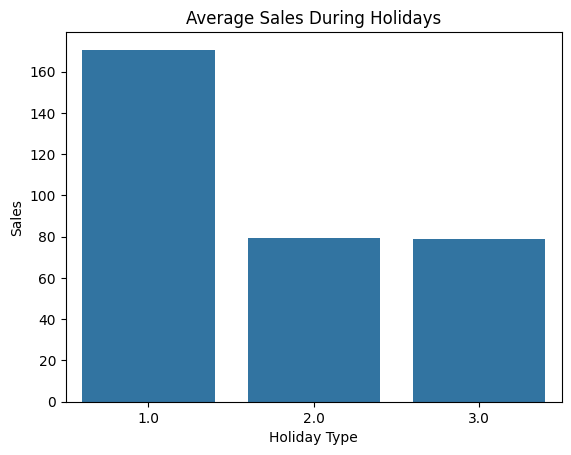

In [209]:
# Sales behavior before, during, and after holidays
def analyze_holiday_sales(data):
    holiday_sales = data.groupby('StateHoliday')['Sales'].mean()
    print("Average sales during holidays:\n", holiday_sales)

    sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
    plt.title("Average Sales During Holidays")
    plt.ylabel("Sales")
    plt.xlabel("Holiday Type")
    plt.show()
analyze_holiday_sales(train_data)

In [210]:
# Seasonal purchase behaviors
def analyze_seasonal_sales(data):
    data['Month'] = data['Date'].dt.month
    seasonal_sales = data.groupby('Month')['Sales'].mean()

    sns.lineplot(x=seasonal_sales.index, y=seasonal_sales.values)
    plt.title("Seasonal Sales Trend")
    plt.ylabel("Average Sales")
    plt.xlabel("Month")
    plt.show()


Promo impact on Sales and Customers:
              Sales   Customers
Promo                         
0      4246.155097  488.648294
1      7693.941189  774.771645


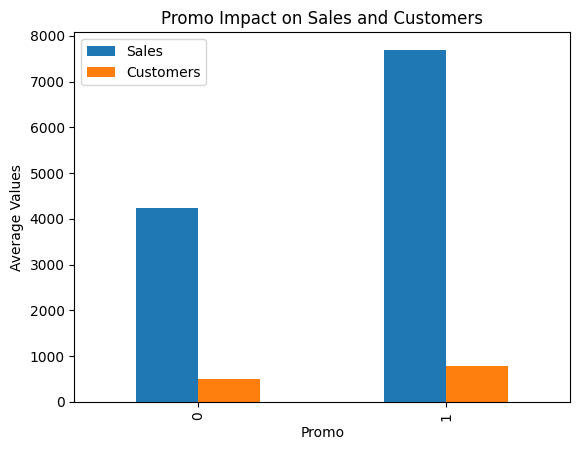

In [211]:
# Promo impact on sales and customers
def analyze_promo_impact(data):
    promo_sales = data.groupby('Promo')[['Sales', 'Customers']].mean()
    print("Promo impact on Sales and Customers:\n", promo_sales)

    promo_sales.plot(kind='bar')
    plt.title("Promo Impact on Sales and Customers")
    plt.ylabel("Average Values")
    plt.show()

analyze_promo_impact(train_data)


In [212]:
# Effective promo deployment by store
def analyze_promo_by_store(data):
    promo_by_store = data.groupby('Store')['Promo'].sum().sort_values(ascending=False)
    top_promo_stores = promo_by_store.head(10)
    print("Top 10 stores with the most promotions:\n", top_promo_stores)

analyze_promo_by_store(train_data)

Top 10 stores with the most promotions:
 Store
1      360
658    360
642    360
643    360
647    360
648    360
649    360
651    360
653    360
654    360
Name: Promo, dtype: int64


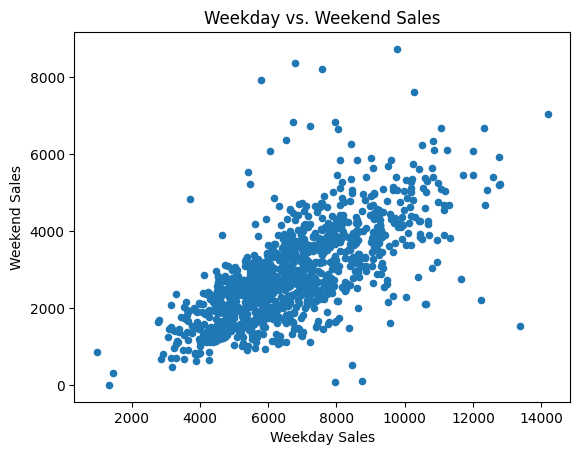

In [213]:
# Stores open all weekdays and their weekend sales
def analyze_weekday_weekend(data):
    weekday_sales = data[data['DayOfWeek'] <= 5].groupby('Store')['Sales'].mean()
    weekend_sales = data[data['DayOfWeek'] > 5].groupby('Store')['Sales'].mean()

    comparison = pd.DataFrame({'Weekday Sales': weekday_sales, 'Weekend Sales': weekend_sales})
    comparison.dropna().plot(kind='scatter', x='Weekday Sales', y='Weekend Sales')
    plt.title("Weekday vs. Weekend Sales")
    plt.show()

analyze_weekday_weekend(train_data)

In [214]:
store = pd.read_csv('/content/drive/MyDrive/store sales data/store.csv')

In [215]:
store = pd.read_csv('/content/drive/MyDrive/store sales data/store.csv')
store.set_index('Store', inplace=True)
train_data.set_index('Store', inplace=True)

# Join DataFrames
sore_train = store.join(train_data, how='inner')  # Options: 'inner', 'outer', 'left', 'right'
print(store_train)

      StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
Store                                                                        
1             c          a               1270.0                        9.0   
1             c          a               1270.0                        9.0   
1             c          a               1270.0                        9.0   
1             c          a               1270.0                        9.0   
1             c          a               1270.0                        9.0   
...         ...        ...                  ...                        ...   
1115          d          c               5350.0                        0.0   
1115          d          c               5350.0                        0.0   
1115          d          c               5350.0                        0.0   
1115          d          c               5350.0                        0.0   
1115          d          c               5350.0                 

Sales by Assortment Type:
 Assortment
a    5316.145540
b    5465.974586
c    5817.440090
Name: Sales, dtype: float64


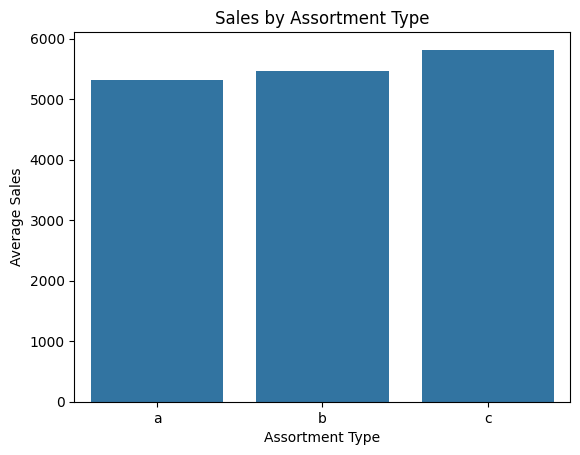

In [216]:
# 8. Assortment type effect on sales
def analyze_assortment_effect(data):
    assortment_sales = data.groupby('Assortment')['Sales'].mean()
    print("Sales by Assortment Type:\n", assortment_sales)

    sns.barplot(x=assortment_sales.index, y=assortment_sales.values)
    plt.title("Sales by Assortment Type")
    plt.ylabel("Average Sales")
    plt.xlabel("Assortment Type")
    plt.show()
analyze_assortment_effect(store_train)

**Sales and Customers Insights**

In [218]:
top_sales_stores = store_train.groupby('Store')['Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Stores by Total Sales:\n", top_sales_stores)


Top 10 Stores by Total Sales:
 Store
1075    9004545
546     8913941
84      8661157
1066    8552239
467     8507858
390     8504025
211     8470844
532     8454204
640     8431817
1033    8406792
Name: Sales, dtype: int64


**Promotional Effectiveness**

In [219]:
promo_effect = store_train.groupby('Promo')['Sales'].mean()
print("Average Sales with and without Promotions:\n", promo_effect)

Average Sales with and without Promotions:
 Promo
0    4246.155097
1    7693.941189
Name: Sales, dtype: float64


In [220]:
holiday_sales = store_train.groupby('StateHoliday')['Sales'].mean()
print("Average Sales by Holiday Type:\n", holiday_sales)


Average Sales by Holiday Type:
 StateHoliday
0.0    5721.899687
1.0     170.572253
2.0      79.456613
3.0      78.713515
Name: Sales, dtype: float64


### **Task 2 - Prediction of store sales**

In [221]:
# Extract datetime features
def Extract_datetime_features(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['Weekday'] = data['Date'].dt.weekday
    data['IsWeekend'] = data['Weekday'].isin([5, 6]).astype(int)
    data['DaysToNextHoliday'] = data['StateHoliday'].shift(-1).notna().cumsum() - data['StateHoliday'].notna().cumsum()
    data['DaysSinceLastHoliday'] = data['StateHoliday'].notna().cumsum() - data['StateHoliday'].shift(1).notna().cumsum()
    data['MonthPart'] = pd.cut(data['Date'].dt.day, bins=[0, 10, 20, 31], labels=['Start', 'Mid', 'End'])
Extract_datetime_features(store_train)

In [222]:
# Log the process
logging.info("Starting the data preparation and model training pipeline.")


In [223]:
logging.info("Splitting data into train and test sets.")
X_train = train_data.drop(columns=['Sales', 'Date'])
y_train = train_data['Sales']

In [224]:
# Pipeline creation
logging.info("Creating the pipeline with StandardScaler and RandomForestRegressor.")
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))

In [225]:
# Train model
logging.info("Training the model.")
pipeline.fit(X_train, y_train)
logging.info("Model training completed.")

In [230]:
# Predictions
logging.info("Making predictions on the test set.")
y_pred = pipeline.predict(test_data)
logging.info("Predictions completed.")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Date
- Id
- Store
Feature names seen at fit time, yet now missing:
- Customers


**Loss Function**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")